# 0. Data loading

In [1]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import pdb

C:\Users\Ken\Anaconda3\envs\tf-gpu\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\Ken\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ken\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ken\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 

In [2]:
df = pd.read_excel(os.path.join('re06282019ai','CNY-202002_03132020.xlsx'), sheet_name = 1)
df.head(10)

,Dates,CNY-USD X-RATE,CNY-USD X-RATE - change one day percentage,China Interest Rate for Requir,China Interest Rate for Excess,China Govt Bond Generic Bid Yi,China Trade Balance with Unite,China Manufacturing PMI SA,China Consumer Confidence Inde,China Retail Sales Value YoY,...,China Potential GDP Growth-Com,China Potential GDP Growth-Com.1,SHANGHAI SE COMPOSITE,SHANGHAI SE COMPOSITE Volume,SHANGHAI SE COMPOSITE Price Chang One Day Percentage,DOW JONES INDUS. AVG,DOW JONES INDUS. AVG Volume,DOW JONES INDUS. AVG Price Change One Day Percentage,CLKQINDX Index,CBOE Volatility Index
0,2020-01-30,6.9426,0.5212,1.62,0.72,3.003,23346.39,50.2,124.6,8.0,...,2.624,2.624,2976.528,26287511677,-2.752,28859.44,84876065,0.43,9.4,15.49
1,2020-01-29,6.9426,0.5212,1.62,0.72,3.003,23346.39,50.2,124.6,8.0,...,2.624,2.624,2976.528,26287511677,-2.752,28734.45,80738981,0.04,9.4,16.39
2,2020-01-28,6.9426,0.5212,1.62,0.72,3.003,23346.39,50.2,124.6,8.0,...,2.624,2.624,2976.528,26287511677,-2.752,28722.85,86666750,0.66,9.4,16.28
3,2020-01-27,6.9426,0.5212,1.62,0.72,3.003,23346.39,50.2,124.6,8.0,...,2.624,2.624,2976.528,26287511677,-2.752,28535.80,99290901,-1.57,9.4,18.23
4,2020-01-24,6.9426,0.5212,1.62,0.72,3.003,23346.39,50.2,124.6,8.0,...,2.624,2.624,2976.528,26287511677,-2.752,28989.73,97900285,-0.58,9.4,14.56
5,2020-01-23,6.9426,0.5212,1.62,0.72,3.003,23346.39,50.2,124.6,8.0,...,2.624,2.624,2976.528,26287511677,-2.752,29160.09,84967865,-0.09,9.4,12.98
6,2020-01-22,6.9066,0.0116,1.62,0.72,3.028,23346.39,50.2,124.6,8.0,...,2.624,2.624,3060.754,21342765952,0.282,29186.27,78523146,-0.03,9.4,12.91
7,2020-01-21,6.9058,0.5680,1.62,0.72,3.044,23346.39,50.2,124.6,8.0,...,2.624,2.624,3052.142,22092239040,-1.410,29196.04,100433330,-0.52,9.4,12.85
8,2020-01-20,6.8668,0.1035,1.62,0.72,3.057,23346.39,50.2,124.6,8.0,...,2.624,2.624,3095.787,19796105655,0.660,29348.10,119226506,0.17,9.4,12.10
9,2020-01-17,6.8597,-0.2791,1.62,0.72,3.088,23346.39,50.2,124.6,8.0,...,2.624,2.624,3075.496,17617083769,0.046,29348.10,119226506,0.17,9.4,12.10


In [3]:
# sorting the data based on "dates"
df_sorted = df.sort_values('Dates')
df_sorted = df_sorted.set_index('Dates')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2891 entries, 2009-01-01 to 2020-01-30
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CNY-USD X-RATE                                        2891 non-null   float64
 1   CNY-USD X-RATE - change one day percentage            2891 non-null   float64
 2   China Interest Rate for Requir                        2891 non-null   float64
 3   China Interest Rate for Excess                        2891 non-null   float64
 4   China Govt Bond Generic Bid Yi                        2891 non-null   float64
 5   China Trade Balance with Unite                        2891 non-null   float64
 6   China Manufacturing PMI SA                            2891 non-null   float64
 7   China Consumer Confidence Inde                        2891 non-null   float64
 8   China Retail Sales Value YoY            

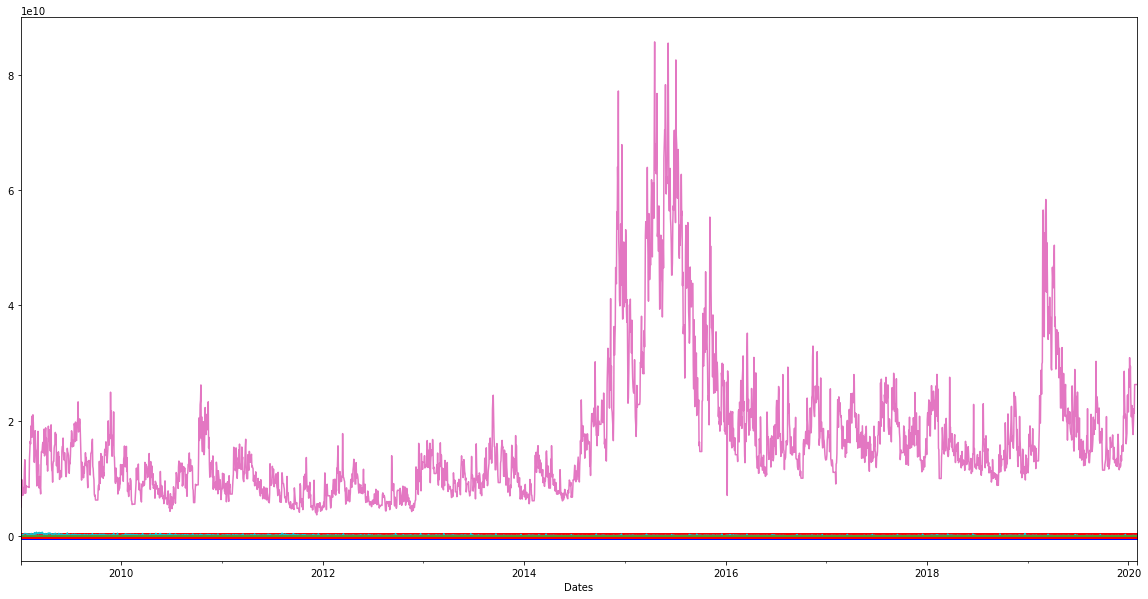

In [4]:
# Data showing & drawing
df_sorted.info()
df_sorted.plot(style = ['k--', 'bo-', 'r*'], legend=False, figsize=(20, 10))

# 1-1. Data cleaning

In [5]:
# Determine which data have null value
null_data_names = df_sorted.isna().any()[lambda x:x]
null_data_names = null_data_names.index
# Fill the NaN data by the average value
for null_data_name in null_data_names:
    df_sorted[null_data_name] = df_sorted[null_data_name].fillna(df[null_data_name].mean())

# 1-2. Data normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_sorted)

# 2. Data spliting 

In [7]:
X_train = []
y_train = []
seq_num = 20
for i in range(seq_num, 2891):
    X_train.append(training_set_scaled[i-seq_num:i, 1:].reshape(-1, 1))
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

n_total = X_train.shape[0]
n_train = round(n_total*0.6)
n_valid = round(n_total*0.8)
# split into input and outputs
train_X, train_y = X_train[:n_train, :, :], y_train[:n_train]
valid_X, valid_y = X_train[n_train:n_valid, :, :], y_train[n_train:n_valid]
test_X, test_y = X_train[n_valid:, :, :], y_train[n_valid:]

# 3. LSTM model building

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(train_X, train_y, epochs = 40, validation_data=(valid_X, valid_y), batch_size = 32)

Using TensorFlow backend.



Train on 1723 samples, validate on 574 samples
Epoch 1/40
1723/1723 [==============================] - 175s 101ms/step - loss: 0.0697 - val_loss: 0.0694
Epoch 2/40
1723/1723 [==============================] - 174s 101ms/step - loss: 0.0240 - val_loss: 0.2136
Epoch 3/40
1723/1723 [==============================] - 171s 99ms/step - loss: 0.0121 - val_loss: 0.2785
Epoch 4/40
1723/1723 [==============================] - 171s 99ms/step - loss: 0.0105 - val_loss: 0.2529
Epoch 5/40
1723/1723 [==============================] - 171s 99ms/step - loss: 0.0086 - val_loss: 0.3273
Epoch 6/40
1723/1723 [==============================] - 171s 99ms/step - loss: 0.0079 - val_loss: 0.2816
Epoch 7/40
1723/1723 [==============================] - 162s 94ms/step - loss: 0.0080 - val_loss: 0.2587
Epoch 8/40
1723/1723 [==============================] - 160s 93ms/step - loss: 0.0067 - val_loss: 0.2659
Epoch 9/40
1723/1723 [==============================] - 160s 93ms/step - loss: 0.0072 - val_loss: 0.2574
Epoch

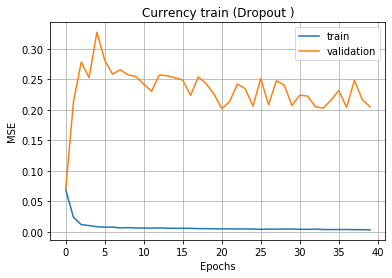

In [39]:
plt.plot(regressor.history.history['loss'], label='train')
plt.plot(regressor.history.history['val_loss'], label='validation')
plt.title('Currency train (Dropout )')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# serialize model to JSON
model_json = regressor.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
regressor.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# 4. Result showing

In [19]:
print(range(0,train_y.shape[0],250))

range(0, 1723, 250)


Text(0.5, 1.0, 'Training results')

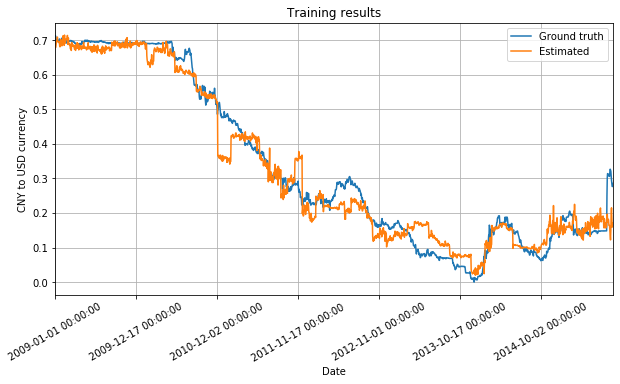

In [41]:
fig_train, ax_train = plt.subplots(1, 1, figsize = [10,5])
ax_train.plot(train_y)
ax_train.plot(regressor.predict(train_X))
ax_train.grid(True)
ax_train.set_xticks(range(0,train_y.shape[0],250))
ax_train.set_xticklabels(df_sorted[:n_train].index[::250], rotation=30)
ax_train.set_xlabel('Date')
ax_train.set_ylabel('CNY to USD currency')
ax_train.autoscale(enable=True, axis='x', tight=True)
ax_train.legend(['Ground truth', 'Estimated'])
ax_train.set_title('Training results')

Text(0.5, 1.0, 'Validation results')

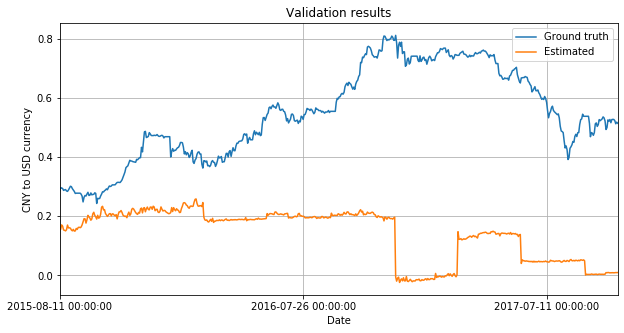

In [42]:
fig_valid, ax_valid = plt.subplots(1, 1, figsize = [10,5])
ax_valid.plot(valid_y)
ax_valid.plot(regressor.predict(valid_X))
ax_valid.grid(True)
ax_valid.set_xticks(range(0,valid_y.shape[0],250))
ax_valid.set_xticklabels(df_sorted[n_train:n_valid].index[::250], rotation=0)
ax_valid.set_xlabel('Date')
ax_valid.set_ylabel('CNY to USD currency')
ax_valid.autoscale(enable=True, axis='x', tight=True)
ax_valid.legend(['Ground truth', 'Estimated'])
ax_valid.set_title('Validation results')

Text(0.5, 1.0, 'Testing results')

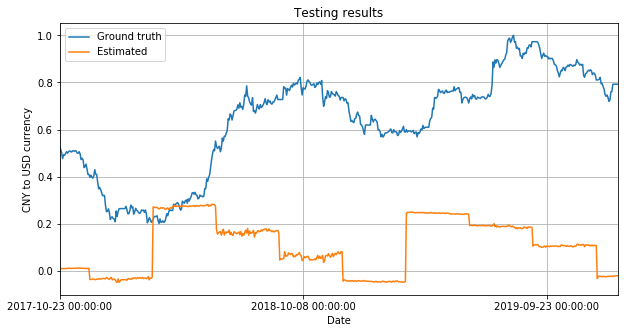

In [43]:
fig_test, ax_test = plt.subplots(1, 1, figsize = [10,5])
ax_test.plot(test_y)
ax_test.plot(regressor.predict(test_X))
ax_test.grid(True)
ax_test.set_xticks(range(0,test_y.shape[0],250))
ax_test.set_xticklabels(df_sorted[n_valid:].index[::250], rotation=0)
ax_test.set_xlabel('Date')
ax_test.set_ylabel('CNY to USD currency')
ax_test.autoscale(enable=True, axis='x', tight=True)
ax_test.legend(['Ground truth', 'Estimated'])
ax_test.set_title('Testing results')

# Other test: Fully-connected Network

In [255]:
# Split dataset into train and test sets
values = df_sorted.values
n_total = df_sorted.index.shape[0]
n_train = round(n_total*0.6)
n_valid = round(n_total*0.8)
train = values[:n_train, :]
valid = values[n_train:n_valid, :]
test = values[n_valid:, :]
# split into input and outputs
train_X, train_y = train[:, 1:], train[:, 0]
valid_X, valid_y = valid[:, 1:], valid[:, 0]
test_X, test_y = test[:, 1:], test[:, 0]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X = valid_hggqa/,.c X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
test_X = test_X.reshape((tesopt_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape, test_X.shape, test_y.shape)

(1735, 1, 45) (1735,) (578, 1, 45) (578,) (578, 1, 45) (578,)


Train on 2024 samples, validate on 867 samples
Epoch 1/100
 - 0s - loss: 972149513.7846 - val_loss: 121482022.4037
Epoch 2/100
 - 0s - loss: 140256328.7779 - val_loss: 190213496.0461
Epoch 3/100
 - 0s - loss: 147736489.3829 - val_loss: 325855485.4902
Epoch 4/100
 - 0s - loss: 186874204.8357 - val_loss: 228305777.0150
Epoch 5/100
 - 0s - loss: 188371954.7688 - val_loss: 349149741.0657
Epoch 6/100
 - 0s - loss: 166716022.2470 - val_loss: 118620641.3656
Epoch 7/100
 - 0s - loss: 164816318.3725 - val_loss: 85224646.4683
Epoch 8/100
 - 0s - loss: 113681756.1307 - val_loss: 411713107.7832
Epoch 9/100
 - 0s - loss: 152301737.1324 - val_loss: 99679150.9942
Epoch 10/100
 - 0s - loss: 71570479.2720 - val_loss: 186044667.6632
Epoch 11/100
 - 0s - loss: 66023419.2243 - val_loss: 178144225.0334
Epoch 12/100
 - 0s - loss: 56661191.0713 - val_loss: 44754055.9354
Epoch 13/100
 - 0s - loss: 85315249.4069 - val_loss: 155882737.4764
Epoch 14/100
 - 0s - loss: 62879649.1491 - val_loss: 109851132.0138
Epoc

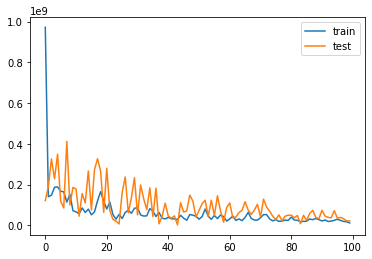

In [183]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
keras.backend.clear_session()
# design network
model = Sequential()
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()